# **Predict Cancer Mortality Rates in US Counties**

The provided dataset comprises data collected from multiple counties in the US. The regression task for this assessment is to predict cancer mortality rates in "unseen" US counties, given some training data. The training data ('Training_data.csv') comprises various features/predictors related to socio-economic characteristics, amongst other types of information for specific counties in the country. The corresponding target variables for the training set are provided in a separate CSV file ('Training_data_targets.csv'). Use the notebooks provided for lab sessions throughout this module to provide solutions to the exercises listed below. Throughout all exercises, text describing your code and answering any questions included in the exercise descriptions should be provided as part of your submitted solution. (Total Marks for this Assessment is 40)

Note - We also provide an example test data set ('Test_data_example.csv' and 'Test_data_example_targets.csv'). This is just an example of the final test set (which will not be provided to you) that will be used to evaluate your solutions when your submitted solutions are being marked. Part of this assessment requires you to write an inference script that evaluates the regression models you have trained on the final test data set such that we are able to run the inference script ourselves on the test data (you can use the example test data to verify that it works prior to submission).

The list of predictors/features available in this data set are described below:

**Data Dictionary**

avgAnnCount: Mean number of reported cases of cancer diagnosed annually

avgDeathsPerYear: Mean number of reported mortalities due to cancer

incidenceRate: Mean per capita (100,000) cancer diagoses

medianIncome: Median income per county 

popEst2015: Population of county 

povertyPercent: Percent of populace in poverty 

MedianAge: Median age of county residents 

MedianAgeMale: Median age of male county residents 

MedianAgeFemale: Median age of female county residents 

AvgHouseholdSize: Mean household size of county 

PercentMarried: Percent of county residents who are married 

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school 

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma 

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college 

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree 

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma 

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree 

PctEmployed16_Over: Percent of county residents ages 16 and over employed 

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed 

PctPrivateCoverage: Percent of county residents with private health coverage 

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) 

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage 

PctPublicCoverage: Percent of county residents with government-provided health coverage 

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone 

PctWhite: Percent of county residents who identify as White 

PctBlack: Percent of county residents who identify as Black 

PctAsian: Percent of county residents who identify as Asian 

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian 

PctMarriedHouseholds: Percent of married households 

BirthRate: Number of live births relative to number of women in county 

In [1]:
#importing all packages and defining path
import pandas as pd
from numpy import mean
from numpy import std
from sklearn.linear_model import LassoCV
from numpy import arange
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
import numpy as  np
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from pandas.plotting import scatter_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

root_dir = './' # this is to be defined by you 
local_path = '/datasets/COMP5611M_Assessment/' # store the related data files in this folder

data_dir = root_dir + local_path
## Define paths to the training data and targets files
training_data_path = data_dir + 'Training_data.csv'
training_targets_path = data_dir + 'Training_data_targets.csv'

# **Exercise 1**

Read in the training data and targets files. The training data comprises features/predictors while the targets file comprises the targets (i.e. cancer mortality rates in US counties) you need to train models to predict. Plot histograms of all features to visualise their distributions and identify outliers. Do you notice any unusual values for any of the features? If so comment on these in the text accompanying your code. Compute correlations of all features with the target variable (across the data set) and sort them according the strength of correlations. Which are the top five features with strongest correlations to the targets? Plot these correlations using the scatter matrix plotting function available in pandas and comment on at least two sets of features that show visible correlations to each other. (5 marks)

In [2]:
#reading dataset using pandas
train_data = pd.read_csv(training_data_path)
targets = pd.read_csv(training_targets_path)

In [4]:
train_data.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,59.0,30,404.3,33975,8251,20.5,0.0,51.3,50.8,51.9,...,NaN,26.0,49.7,20.6,96.684036,0.438181,0.082899,0.272383,51.926207,5.041436
1,114.0,41,403.8,47363,22702,13.8,0.0,40.8,39.8,42.7,...,56.5,46.8,31.6,13.0,92.295459,2.102845,0.609648,0.879131,50.949545,6.329661
2,33.0,11,352.0,77222,9899,6.8,0.0,38.1,36.9,39.8,...,65.4,54.3,18.2,8.6,95.690422,0.000000,0.523871,0.118612,64.532156,5.148130
3,254.0,100,429.6,80650,48904,7.5,0.0,43.5,42.7,44.1,...,64.2,55.6,28.8,13.5,89.606996,7.407407,0.870370,0.450617,62.344481,5.627462
4,75.0,32,407.5,42839,22255,14.6,0.0,31.1,30.2,31.6,...,50.7,46.5,26.8,18.1,79.587990,2.948701,8.482564,5.637090,63.005948,10.436469


Histograms of all the factors

array([[<AxesSubplot:title={'center':'avgAnnCount'}>,
        <AxesSubplot:title={'center':'avgDeathsPerYear'}>,
        <AxesSubplot:title={'center':'incidenceRate'}>,
        <AxesSubplot:title={'center':'medIncome'}>,
        <AxesSubplot:title={'center':'popEst2015'}>,
        <AxesSubplot:title={'center':'povertyPercent'}>],
       [<AxesSubplot:title={'center':'studyPerCap'}>,
        <AxesSubplot:title={'center':'MedianAge'}>,
        <AxesSubplot:title={'center':'MedianAgeMale'}>,
        <AxesSubplot:title={'center':'MedianAgeFemale'}>,
        <AxesSubplot:title={'center':'AvgHouseholdSize'}>,
        <AxesSubplot:title={'center':'PercentMarried'}>],
       [<AxesSubplot:title={'center':'PctNoHS18_24'}>,
        <AxesSubplot:title={'center':'PctHS18_24'}>,
        <AxesSubplot:title={'center':'PctSomeCol18_24'}>,
        <AxesSubplot:title={'center':'PctBachDeg18_24'}>,
        <AxesSubplot:title={'center':'PctHS25_Over'}>,
        <AxesSubplot:title={'center':'PctBachDeg25_O

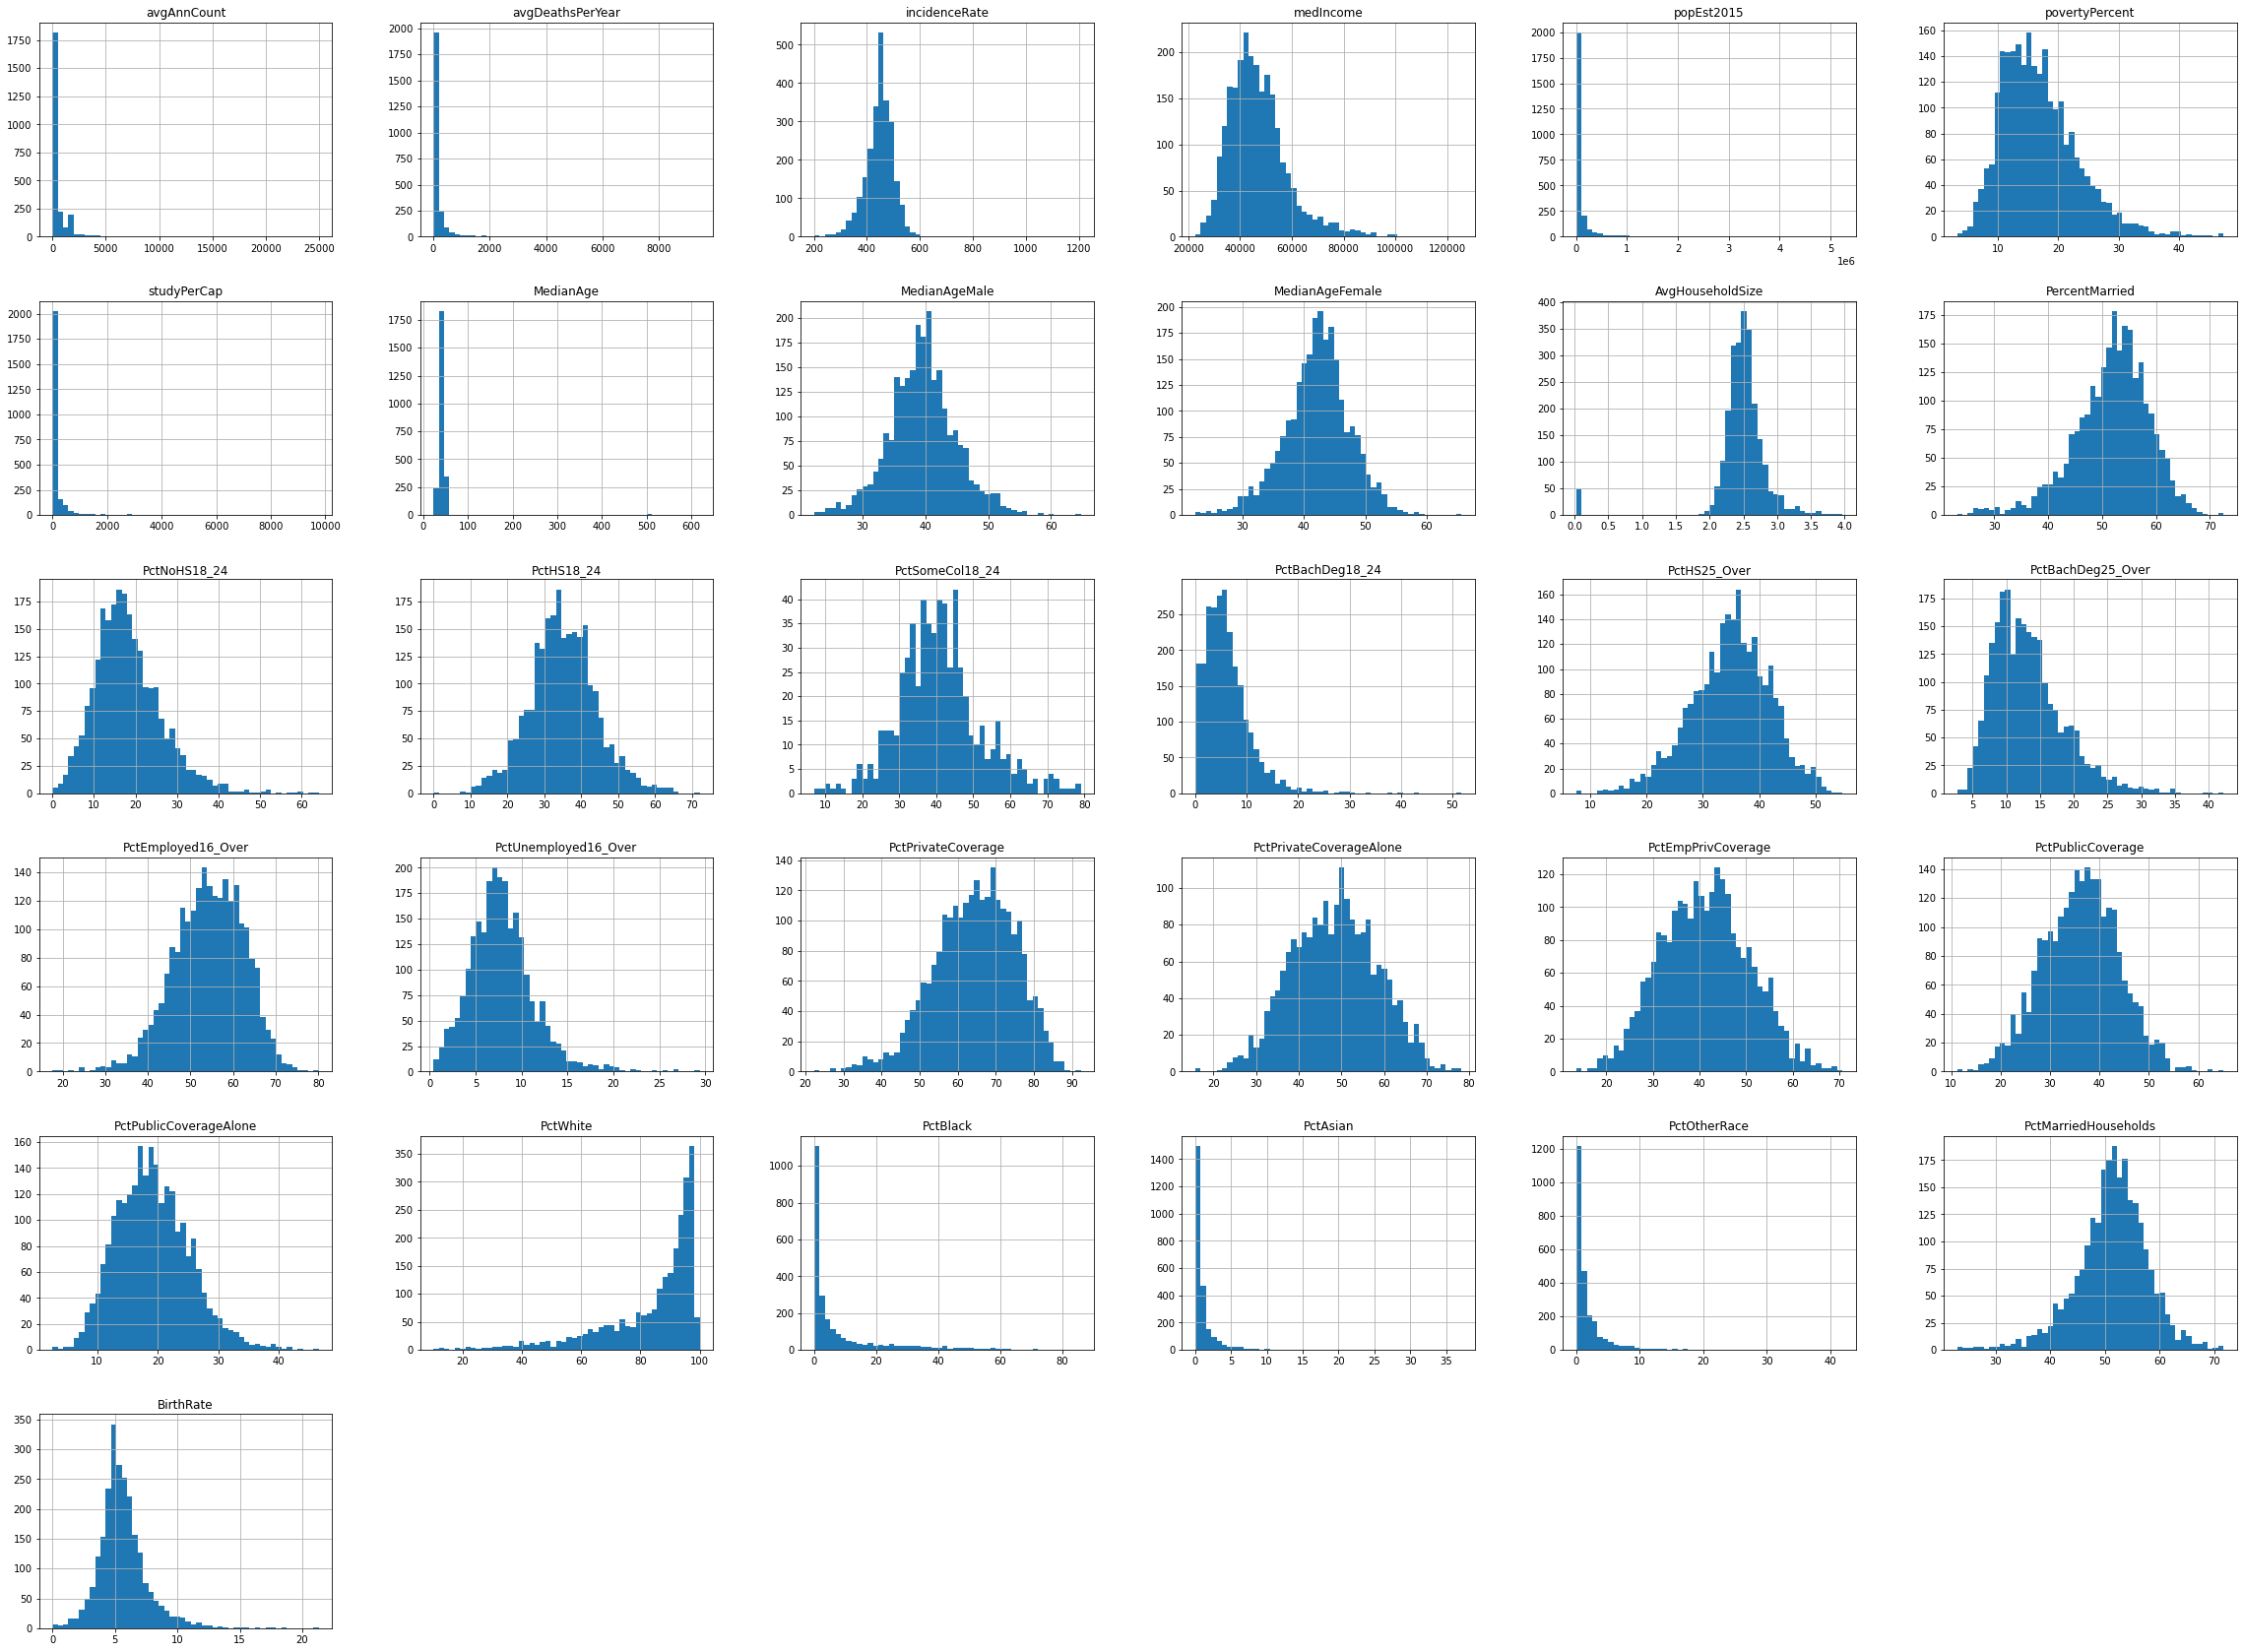

In [4]:

train_data.hist(bins=50,figsize=(40,30))

There were only 2 cases in which outliers were spotted. MedianAge and AvgHouseholdsize were the ones that had absurd values in some cases. Like the MedianAge was more than 400 for a few entries. AvgHouseholdsize was about 0.01 for a number of rows. Both AvgHouseholdsize and MedianAge can't possibly have these values and must be errors which is why they're being considered as the outliers here. A lot of factors are normally distributed as well.

In [5]:
#finding correlations and sorting them in a descending order

corr={}
for i in range(len(train_data.columns)) :
    corr[train_data.columns[i]] = abs(train_data[train_data.columns[i]].corr(targets['TARGET_deathRate']))
sor_cor = {k: v for k, v in sorted(corr.items(), key=lambda item: item[1],reverse = True)}
sor_cor

{'PctBachDeg25_Over': 0.49141088348272244,
 'incidenceRate': 0.44398325045239007,
 'PctPublicCoverageAlone': 0.4397339266743923,
 'medIncome': 0.416606804989592,
 'povertyPercent': 0.41326005865421833,
 'PctHS25_Over': 0.4099154744122088,
 'PctEmployed16_Over': 0.4003168080780501,
 'PctPublicCoverage': 0.3918993715796028,
 'PctPrivateCoverage': 0.38278606787668445,
 'PctUnemployed16_Over': 0.3626123846209571,
 'PctPrivateCoverageAlone': 0.35504981746698683,
 'PctMarriedHouseholds': 0.2906447675528536,
 'PctBachDeg18_24': 0.28456615620732645,
 'PctHS18_24': 0.26628478504560227,
 'PercentMarried': 0.26615294409212586,
 'PctEmpPrivCoverage': 0.2590060894954694,
 'PctBlack': 0.23638042232696993,
 'PctSomeCol18_24': 0.18613994490057045,
 'PctOtherRace': 0.18260203285858256,
 'PctAsian': 0.18194756801847342,
 'PctWhite': 0.17452114415320316,
 'avgAnnCount': 0.1500191674043368,
 'popEst2015': 0.13012246061830512,
 'avgDeathsPerYear': 0.09404755907149374,
 'PctNoHS18_24': 0.09056499653532299,


PctBachDeg25_Over, incidenceRate, PctPublicCoverageAlone, medIncome, and povertyPercent had highest correlations with the target in a decreasing order. It looks like percentage of bachelor's degree holder aged over 25 are the most important factor when it comes to this.

array([[<AxesSubplot:xlabel='PctBachDeg25_Over', ylabel='PctBachDeg25_Over'>,
        <AxesSubplot:xlabel='incidenceRate', ylabel='PctBachDeg25_Over'>,
        <AxesSubplot:xlabel='PctPublicCoverageAlone', ylabel='PctBachDeg25_Over'>,
        <AxesSubplot:xlabel='medIncome', ylabel='PctBachDeg25_Over'>,
        <AxesSubplot:xlabel='povertyPercent', ylabel='PctBachDeg25_Over'>],
       [<AxesSubplot:xlabel='PctBachDeg25_Over', ylabel='incidenceRate'>,
        <AxesSubplot:xlabel='incidenceRate', ylabel='incidenceRate'>,
        <AxesSubplot:xlabel='PctPublicCoverageAlone', ylabel='incidenceRate'>,
        <AxesSubplot:xlabel='medIncome', ylabel='incidenceRate'>,
        <AxesSubplot:xlabel='povertyPercent', ylabel='incidenceRate'>],
       [<AxesSubplot:xlabel='PctBachDeg25_Over', ylabel='PctPublicCoverageAlone'>,
        <AxesSubplot:xlabel='incidenceRate', ylabel='PctPublicCoverageAlone'>,
        <AxesSubplot:xlabel='PctPublicCoverageAlone', ylabel='PctPublicCoverageAlone'>,
        

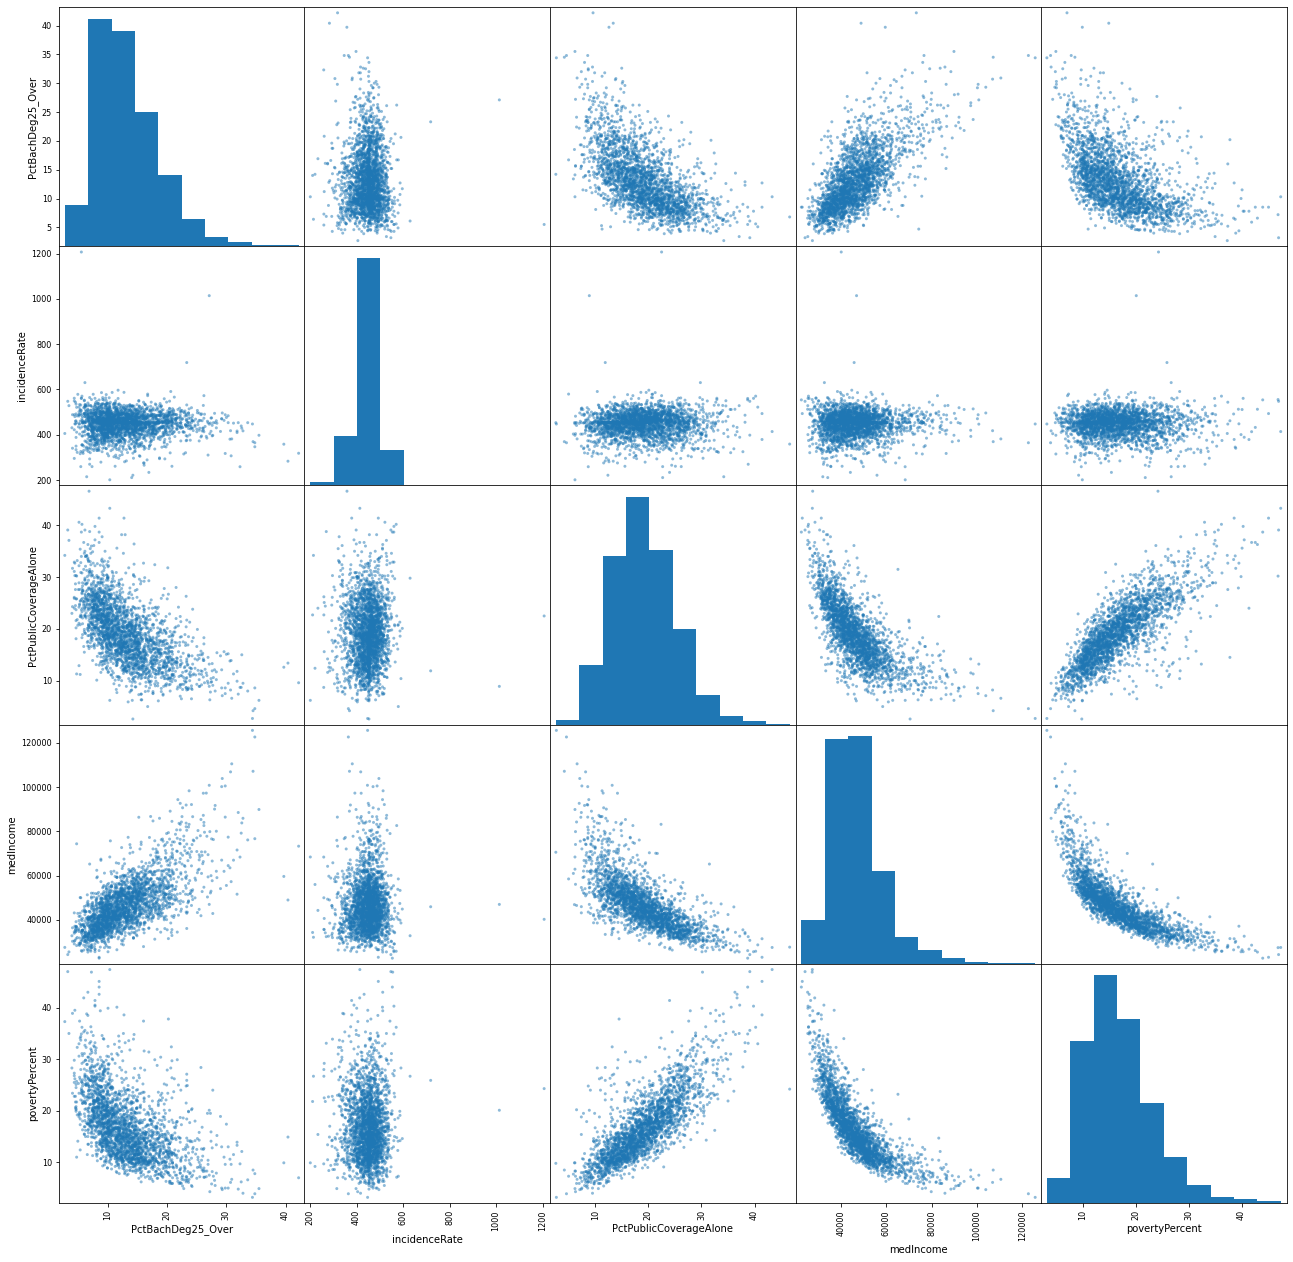

In [6]:
#scatter matrix plot of 5 top factors showcasing their correlations with each other

attributes=['PctBachDeg25_Over',
 'incidenceRate',
 'PctPublicCoverageAlone',
 'medIncome',
 'povertyPercent']

scatter_matrix(train_data[attributes],figsize=(22,22))

medIncome and povertyPercent show a highly negative correlation which makes sense as if a higher percent of population is poor, the median income will most definitely be lower in a region. 

povertyPercent and PctPublicCoverageAlone had a high positive correlation which is reasonable as poor people generally have government-provided health coverage alone. 

medIncome and PctBachDeg25_Over are positively correlated as well. If there are more educated bachelor's in a region, there is bound to be a higher median Income as well since eduction translates to income. Higher the proportion of educated individuals, higher the median Income.

# **Exercise 2**

Create an ML pipeline using scikit-learn (as demonstrated in the lab notebooks) to pre-process the training data. (3 marks)

In [7]:
#finding number of null values in each column

nulla={}
for i in range(len(train_data.columns)) :
    nulla[train_data.columns[i]] = train_data[train_data.columns[i]].isnull().sum().sum()
nulla

{'avgAnnCount': 0,
 'avgDeathsPerYear': 0,
 'incidenceRate': 0,
 'medIncome': 0,
 'popEst2015': 0,
 'povertyPercent': 0,
 'studyPerCap': 0,
 'MedianAge': 0,
 'MedianAgeMale': 0,
 'MedianAgeFemale': 0,
 'AvgHouseholdSize': 0,
 'PercentMarried': 0,
 'PctNoHS18_24': 0,
 'PctHS18_24': 0,
 'PctSomeCol18_24': 1829,
 'PctBachDeg18_24': 0,
 'PctHS25_Over': 0,
 'PctBachDeg25_Over': 0,
 'PctEmployed16_Over': 119,
 'PctUnemployed16_Over': 0,
 'PctPrivateCoverage': 0,
 'PctPrivateCoverageAlone': 483,
 'PctEmpPrivCoverage': 0,
 'PctPublicCoverage': 0,
 'PctPublicCoverageAlone': 0,
 'PctWhite': 0,
 'PctBlack': 0,
 'PctAsian': 0,
 'PctOtherRace': 0,
 'PctMarriedHouseholds': 0,
 'BirthRate': 0}

PctSomeCol18_24, PctEmployed16_Over and PctPrivateCoverageAlone are the only ones with null values. But its not only a few null values that these variables have. They have quite high null values that will need to be imputed with medians.


In [8]:
# identify outliers and remove them
data_mean, data_std = mean(train_data.MedianAge), std(train_data.MedianAge)

cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

train_data = train_data.drop(train_data[(train_data.MedianAge < lower) | (train_data.MedianAge > upper)].index)

data_mean, data_std = mean(train_data.AvgHouseholdSize), std(train_data.AvgHouseholdSize)

cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
train_data = train_data.drop(train_data[(train_data.AvgHouseholdSize < lower) | (train_data.AvgHouseholdSize > upper)].index)


In [9]:
#creating an imputation and standardisation pipeline

num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler())
])


In [75]:
#preparing the train data for regression tasks
print(train_data.shape)
train_data_prepared = num_pipeline.fit_transform(train_data)
a = train_data.index.values.tolist()
targets = targets.loc[a]


(2359, 31)


After removing the outliers, and passing data through the pipeline there were 2359 rows left. The data was first imputed with medians for missing values. It was then standardised for better computation using pipelines.

# **Exercise 3**

Fit linear regression models to the pre-processed data using: Ordinary least squares (OLS), Lasso and Ridge models. Choose suitable regularisation weights for Lasso and Ridge regression and include a description in text of how they were chosen. In your submitted solution make sure you set the values for the regularisation weights equal to those you identify from your experiment(s). Quantitatively compare your results from all three models and report the best performing one. Include code for all steps above. (10 marks)


In [11]:
#method to display the corss validation scores
def display_scores(scores):
    print('Scores:',scores)
    print('Mean:',scores.mean())
    print('Standard deviation:',scores.std())
    

Linear Regression Ordinary least squares (OLS)

In [12]:
#applying OLS linear regression

lin_reg=LinearRegression()
lin_reg.fit(train_data_prepared, targets['TARGET_deathRate'])

LinearRegression()

In [13]:
#showcasing some predictions
some_data=train_data.iloc[100:105]
some_labels=targets['TARGET_deathRate'].iloc[100:105]
some_data_prepared=num_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [168.67999765 190.41698952 175.53279784 172.58568688 170.06157645]
Labels: [184.3, 198.7, 121.8, 147.8, 190.5]


Lasso Regression and its hyperparameter optimisation

In [ ]:
# grid search hyperparameters for lasso regression

X, y = train_data_prepared, targets['TARGET_deathRate']
# define model
modelL = Lasso()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(modelL, grid, scoring='r2', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)


In [17]:
#best aplha param
results.best_params_

{'alpha': 0.05}

In [ ]:
#finding aplha with lassoCV to cross verify with GridSearchCV

X, y = train_data_prepared, targets['TARGET_deathRate']
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
modelL = LassoCV(alphas=arange(0, 1, 0.01), cv=cv, n_jobs=-1)
# fit model
modelL.fit(X, y)

In [19]:
#best aplha param
modelL.alpha_

0.05

Both the searches point to the optimal alpha being 0.05 for Lasso regression.

Ridge Regression and its hyperparameter optimisation

In [22]:
#gridsearch for Ridge
X, y = train_data_prepared, targets['TARGET_deathRate']
# define model
modelR = Ridge()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(modelR, grid, scoring='r2', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize

print('Config: %s' % results.best_params_)

Config: {'alpha': 0.99}


In [23]:
#using ridgeCV for alpha
X, y = train_data_prepared, targets['TARGET_deathRate']
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
modelR = RidgeCV(alphas=arange(0, 1, 0.01), cv=cv, scoring='r2')
# fit model
modelR.fit(X, y)
# summarize chosen configuration
print('alpha: %f' % modelR.alpha_)

alpha: 0.990000


The term hyperparameter refers to any parameter in a machine learning model whose value is not directly derived from the data. We can use hyperparameter optimization to find the value that minimizes the model’s cost function. Both Lasso and Ridge have alpha as regularization parameters. For finding the optimal parameter Grid Search parameter tuning was implemented.
In grid search, we need to define a search space of possible alpha values. The model is then evaluated for every combination of parameters specified in the search. The main advantage of using grid search is that the function can perform iterations over various combinations of possible values for any given number of hyperparameters. 
We started with grid search for both lasso and ridge between a range 0 to 1. For lasso, it came to be 0.05 and this was later confirmed with scikit-learn library lassoCV that automatically finds good hyperparameters via the class.
To use the class, the model is fit on the training dataset as per normal and the hyperparameters are tuned automatically during the training process. The fit model can then be used to make a prediction.
Same process is done on Ridge to find optimum hyperparameter using grid search first and then using the RidgeCV class which verifies the results as well.

Evaluation using $r^2$

In [60]:
#calculating R2 scores for all the three models to evaluate
m=r2_score(targets['TARGET_deathRate'], lin_reg.predict(train_data_prepared))
print('Linear regression: ' , m)

n=r2_score(targets['TARGET_deathRate'], modelL.predict(train_data_prepared))
print('Lasso regression: ' , n)

k=r2_score(targets['TARGET_deathRate'], modelR.predict(train_data_prepared))
print('Ridge regression: ' , k)


Linear regression:  0.5344792514097414
Lasso regression:  0.5335581315515305
Ridge regression:  0.5344769732659898


Performing cross validation as the $r^2$ scores are very comparable and there isn't much difference between all three models.

In [71]:
#calculating R2 scores after applying cross validation on all the three models
scores=cross_val_score(lin_reg, train_data_prepared,targets['TARGET_deathRate'],scoring="r2",cv=10)
print('Linear Regression')
display_scores(scores)
print('')

scores=cross_val_score(modelL, train_data_prepared,targets['TARGET_deathRate'],scoring="r2",cv=10)
print('Lasso Regression')
display_scores(scores)
print('')

scores=cross_val_score(modelR,train_data_prepared, targets['TARGET_deathRate'],scoring="r2",cv=10)
print('Ridge Regression')
display_scores(scores)



Linear Regression
Scores: [0.48633841 0.47090837 0.45282976 0.60294876 0.45908341 0.57075238
 0.55464005 0.5460122  0.49994691 0.44292696]
Mean: 0.5086387211268629
Standard deviation: 0.05305678557032359

Lasso Regression
Scores: [0.49034988 0.47296356 0.45282318 0.60476409 0.46239485 0.57043989
0.55528552 0.54598957 0.50382795 0.44243426]
Mean: 0.5101272746079042
Standard deviation: 0.05279731604793042

Ridge Regression
Scores: [0.48682954 0.47137491 0.45290155 0.60312344 0.45935993 0.57067519
 0.55473167 0.54605594 0.50071632 0.44298967]
Mean: 0.5088758149319401
Standard deviation: 0.052982787758522956


Among all the three models, after applying cross validation the error rate increased. But not so significantly. Lasso model won among the three with the best r2 error score and it explained the dataset more than the rest two.

# **Exercise 4**

Use Lasso regression and the best regularisation weight identified from Exercise 3 to identify the five most important/relevant features for the provided data set and regression task. Report what these are desceding order of their importance. (5 marks)

In [26]:
#model coefficients to check feature importances
modelL.coef_


array([-3.65696204,  6.37575841, 10.35342311,  1.69061266, -3.52496184,
        2.37232935,  0.        , -0.        , -2.83690592, -1.13857411,
       -2.82590828,  4.82144025, -0.89038686,  2.79805481, -0.        ,
        0.10664997,  2.48870253, -7.14116753, -2.26852169,  1.02354209,
       -7.99609962, -0.        ,  3.57443447, -1.05634914,  0.        ,
       -1.82853921, -1.00634786,  0.38020926, -3.02207407, -4.50845955,
       -1.67002772])

In [27]:
#sorting coefficients in a decreasing order
coeff = {}
for i in range(len(train_data.columns)) :
    coeff[train_data.columns[i]] = abs(modelL.coef_[i])
sor_coeff = {k: v for k, v in sorted(coeff.items(), key=lambda item: item[1],reverse = True)}
sor_coeff


{'incidenceRate': 10.353423108766417,
 'PctPrivateCoverage': 7.996099615946058,
 'PctBachDeg25_Over': 7.141167529419073,
 'avgDeathsPerYear': 6.375758408872083,
 'PercentMarried': 4.821440247696803,
 'PctMarriedHouseholds': 4.508459547567704,
 'avgAnnCount': 3.656962037151312,
 'PctEmpPrivCoverage': 3.574434467128485,
 'popEst2015': 3.5249618444200888,
 'PctOtherRace': 3.022074070721046,
 'MedianAgeMale': 2.8369059232535534,
 'AvgHouseholdSize': 2.8259082750729325,
 'PctHS18_24': 2.7980548078900935,
 'PctHS25_Over': 2.4887025291550287,
 'povertyPercent': 2.3723293454485814,
 'PctEmployed16_Over': 2.2685216865432323,
 'PctWhite': 1.8285392110163095,
 'medIncome': 1.6906126615920685,
 'BirthRate': 1.6700277230853364,
 'MedianAgeFemale': 1.1385741062043153,
 'PctPublicCoverage': 1.056349141023352,
 'PctUnemployed16_Over': 1.0235420891274642,
 'PctBlack': 1.0063478571407858,
 'PctNoHS18_24': 0.8903868630521731,
 'PctAsian': 0.38020925994997373,
 'PctBachDeg18_24': 0.10664997155899401,
 'st

The importance of the features can be determined by the magnitude of their coefficent. Higher the magnitude, greater is it's importance. So , the five most important features with their magnitudes are : 

 'incidenceRate': 10.353423108766417,

 'PctPrivateCoverage': 7.996099615946058,

 'PctBachDeg25_Over': 7.141167529419073,

 'avgDeathsPerYear': 6.375758408872083,
 
 'PercentMarried': 4.821440247696803,

# **Exercise 5**

Fit a Random Forest regression model to the training data and quantitatively evaluate and compare the Random Forest regression model with the best linear regression model identified from Exercise 3. Report which model provides the best results. Next, report the top five most important/relevant features for the provided data set and regression task identified using the Random Forest model. Comment on how these compare with the features identified from Lasso regression? (14 marks)

In [28]:
#random forest fitting
forest_reg=RandomForestRegressor()
forest_reg.fit(train_data_prepared,targets['TARGET_deathRate'])

predictions=forest_reg.predict(train_data_prepared)
r2 = r2_score(targets['TARGET_deathRate'], predictions)
r2

0.9336007385911276

In [29]:
#applying cross validation on the forest regression to check its efficiency
scores=cross_val_score(forest_reg,train_data_prepared, targets['TARGET_deathRate'],scoring="r2",cv=10)
display_scores(scores)

Scores: [0.55867721 0.4828817  0.52098847 0.60608503 0.50867539 0.56094646
 0.48286076 0.538304   0.5134288  0.52836011]
Mean: 0.5301207924640333
Standard deviation: 0.03590722781401779


The original random forest was clearly overfitting the dataset so we had to apply cross validtion on it. After applying it the error rate came to half but it was still being more effective than the lasso model. Random forest is winning among all the 4 models that were created in this notebook but not by a huge margin.

In [30]:
#finding features coefficients
forest_reg.feature_importances_

array([0.01522507, 0.03400075, 0.20532887, 0.04582299, 0.02120759,
       0.02018146, 0.00455219, 0.00823905, 0.01034568, 0.01163991,
       0.01970633, 0.01779874, 0.01623522, 0.02332352, 0.00542009,
       0.01506563, 0.03971737, 0.22631224, 0.02291904, 0.02103381,
       0.02481871, 0.01014592, 0.01050428, 0.01096983, 0.03859386,
       0.01530091, 0.02442799, 0.0168644 , 0.02492386, 0.02079281,
       0.01858191])

In [31]:
#sorting coefficients
coeffFor = {}
for i in range(len(train_data.columns)) :
    coeffFor[train_data.columns[i]] = abs(forest_reg.feature_importances_[i])

sor_coeffFor = {k: v for k, v in sorted(coeffFor.items(), key=lambda item: item[1],reverse = True)}
sor_coeffFor


{'PctBachDeg25_Over': 0.22631223981526627,
 'incidenceRate': 0.20532887411892492,
 'medIncome': 0.0458229886253332,
 'PctHS25_Over': 0.03971737151412039,
 'PctPublicCoverageAlone': 0.038593860212770684,
 'avgDeathsPerYear': 0.034000750985905076,
 'PctOtherRace': 0.024923855220888254,
 'PctPrivateCoverage': 0.024818708031086562,
 'PctBlack': 0.024427992136494617,
 'PctHS18_24': 0.023323518959101293,
 'PctEmployed16_Over': 0.02291903679966865,
 'popEst2015': 0.021207592908322803,
 'PctUnemployed16_Over': 0.021033810244179156,
 'PctMarriedHouseholds': 0.020792805603095394,
 'povertyPercent': 0.02018145716937229,
 'AvgHouseholdSize': 0.019706325761018564,
 'BirthRate': 0.018581908921845365,
 'PercentMarried': 0.017798737919015047,
 'PctAsian': 0.01686440085008414,
 'PctNoHS18_24': 0.016235222886213558,
 'PctWhite': 0.0153009143414109,
 'avgAnnCount': 0.015225071502020154,
 'PctBachDeg18_24': 0.015065626652208647,
 'MedianAgeFemale': 0.011639905863591427,
 'PctPublicCoverage': 0.01096982512

## The most imporatant factors in lasso were :

incidenceRate, 

PctPrivateCoverage, 

PctBachDeg25_Over, 

avgDeathsPerYear and 

PercentMarried. 

## While for random forest it is: 

PctBachDeg25_Over, 

incidenceRate, 

medIncome, 

PctHS25_Over and 

avgDeathsPerYear. 

Both the models give a lot of importance to the three factors incidenceRate, avgDeathsPerYear and PctBachDeg25_Over. The lasso model seems to be giving more importance to the percentage of married people and the private insurance cover factor. The random forest on the other hand places these factors at about 15th and later positions, showing their lower insignificance when it comes to modelling them against the target. But the two models agree on atleast 3 factors while putting them in their top five. This should mean that these factors are somewhat more important than others when it comes to modelling cancer mortality rates. PctBachDeg25_Over was the most correlated factor in exploratory analysis and with regression models giving it so much importance it should be verified that it indeed plays a major role in this case.


# **Exercise 6**

Use the provided test example data ('Test_data_example.csv' and 'Test_data_example_targets.csv') to write an inference script to evaluate the best regression model identified from preceding exercises. First re-train the chosen regression model using all of the provided training data and test your predictions on the provided example test data. Note - the final evaluation of your submission will be done by replacing this example test data with held out (unseen) test data that is not provided to you. But the format of this "unseen" test data will be identical to the example test data provided to you. Use the code snippet provided below to prepare your inference script to predict targets for the unseen test data. (3 marks)

In [32]:
## Read in the provided example test data
test_data_path = data_dir + 'Test_data_example.csv'
test_targets_path = data_dir + 'Test_data_example_targets.csv'

test_data = pd.read_csv(test_data_path)
test_targets = pd.read_csv(test_targets_path)
## Retrain your chosen regression model here 
# For example: lin_reg = LinearRegression()
# lin_reg.fit(X_train,y_train) where X_train and y_train is provided training data
# Next write the lines of code required to predict on unseen test data and evaluate your predictions

In [43]:
#training the random forest and showing the predictions on the set.
model = RandomForestRegressor()

model.fit(train_data_prepared, targets['TARGET_deathRate'])


some_labels=test_targets['TARGET_deathRate']
some_data_prepared=num_pipeline.transform(test_data)

print("Predictions:", model.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [174.911 175.401 146.998 202.784 152.157 204.225 167.53  177.259 179.999
 197.45  136.948 223.671 110.484 184.541 181.419 154.756 189.711 204.557
 178.178 177.161 185.647 145.564 197.122 144.561 186.017 192.423 185.153
 182.141 160.271 161.229]
Labels: [181.2, 173.4, 148.4, 213.5, 155.2, 220.2, 156.6, 148.6, 172.8, 164.9, 123.6, 216.3, 136.9, 242.9, 179.4, 146.4, 209.9, 159.8, 170.0, 195.4, 184.3, 158.7, 188.2, 155.8, 191.2, 198.7, 179.0, 186.5, 222.4, 174.2]


In [44]:
#r2 score of random forest 
lin_mse=r2_score(test_targets['TARGET_deathRate'], model.predict(some_data_prepared))

print(lin_mse)

0.3730921921446134


The r2 score has significantly dropped on test set which suggests that even though random forrest was able to generalise the dataset most among the 4 models but it still doesn't perform so well when it comes to unseen data. More tuning of hyperparameters and using more data to train the model could be used to better the efficiency.